In [1]:
#Installing Packages
using Pkg
Pkg.add("InteractiveDynamics")
Pkg.add("DynamicalSystems")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
#Importing Libraries
using InteractiveDynamics, DynamicalSystems, DifferentialEquations, Plots

# The Lorenz Differential Equations
The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system.

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

In [3]:
#Defining the Lorenz Differential Equations
function lorentz!(du,u,p,t)
    x,y,z = u
    sigma,rho,beta = p
    
    du[1] = sigma*(y - x)
    du[2] = rho*x - y - x*z
    du[3] = x*y - beta*z
    
    return nothing
end

lorentz! (generic function with 1 method)

In [4]:
initial = [1.0, 1.0, 1.0] #Initial Conditions
parameters = [10.0, 28.0, 8/3] #value of sigma, rho and beta
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(lorentz!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1288-element Vector{Float64}:
   0.0
   0.03663019341700964
   0.06093468875343597
   0.10228521517950998
   0.14389478888936927
   0.19115878582509604
   0.23901942972194093
   0.289680750007885
   0.34169825830624484
   0.38899508572172187
   0.4356809582605035
   0.4764473342782097
   0.5344615509873378
   ⋮
  99.13774942935241
  99.21932641898152
  99.32252912008265
  99.40785818726042
  99.48994270573851
  99.56323436009583
  99.63851115697649
  99.71319986397535
  99.8017545767978
  99.87658894662931
  99.9743459389774
 100.0
u: 1288-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [1.1576924290036497, 1.9885975428300713, 0.9623343014998665]
 [1.4220993229232164, 2.7717261605827885, 0.9738326400160731]
 [2.187333791393613, 4.593717807132296, 1.1294370354263183]
 [3.48734479931683, 7.432324733244509, 1.6764583607063326]
 [5.933998161178089, 12

# Taken's Theorem (1981)

Using the Taken's Theorem we can embed the time series we have available into a phase space where we do not have a temporal dependence between our data points anymore. This is important because the Statistical Learning Theory only guarantees the learning of an algorithm if the samples (rows or data instances) of our dataset are independent from each other.

In order to define this embedding, we need two hyperparameters named d and m which are the time delay and the embedding dimension respectively. The time delay defines how many data points, previously to the actual one, we will use on the embedding. The dimension will define the final shape of our dataset and how many axies there are in the phase space, each axis representing a time delay.

With those two parameters, given a time series $f(t)$, we will have its embedding as:

$$
\begin{matrix}
f(t) & f(t + d) & \dots & f(t + (m-1)d)\\
f(t+1) & f(t + d + 1) & \dots & f(t + (m-1)d + 1)\\
f(t+2) & f(t + d + 2) & \dots & f(t + (m-1)d) + 2)\\
\dots & \dots & \dots & \\
f(t+(m-1)) & f(t + d + (m -1)) & \dots &  f(t + (m-1)d + (m-1))
\end{matrix}
$$

The idea is that if the series is deterministic enough, then this embedding will generate an attractor on the phase space and we will able to forecast the time series.

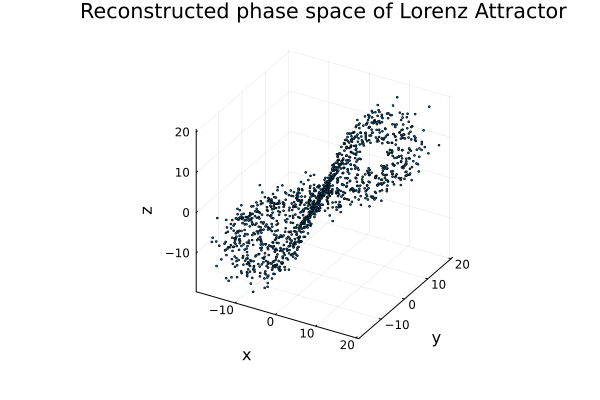

In [5]:
# Extract time series of x variable
x = sol[1,:]

# Embedding parameters
m = 3   # embedding dimension
τ = 1   # time delay

N = length(x) - (m-1)*τ
X = zeros(m, N)
for i in 1:N
    for j in 1:m
        X[j,i] = x[i + (j-1)*τ]
    end
end

# Scatter Plot reconstructed phase space
scatter(X[1,:], X[2,:], X[3,:], markersize=1, xlabel="x", ylabel="y", zlabel="z", legend=false,title="Reconstructed phase space of Lorenz Attractor")

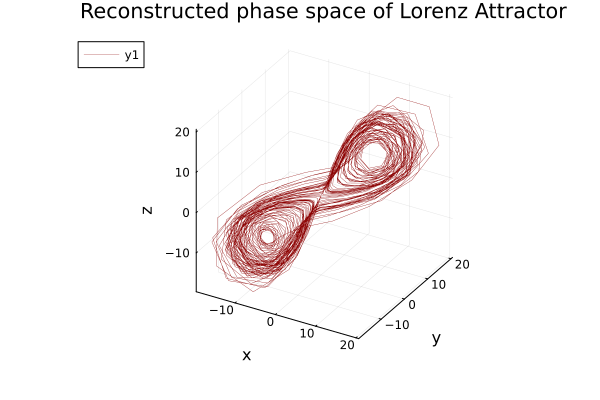

In [6]:
# Line Plot reconstructed phase space
plot(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues,title="Reconstructed phase space of Lorenz Attractor")

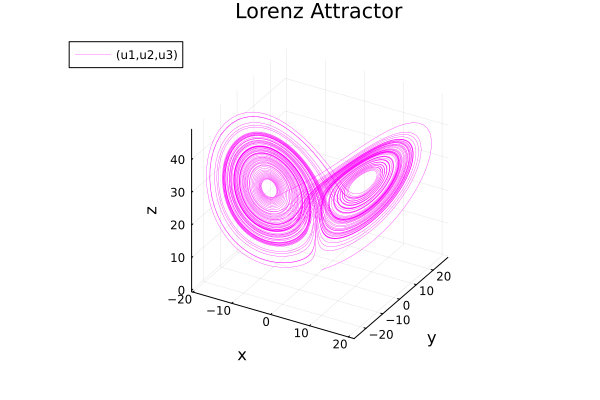

In [7]:
#Lorenz Attractor
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring,title="Lorenz Attractor")

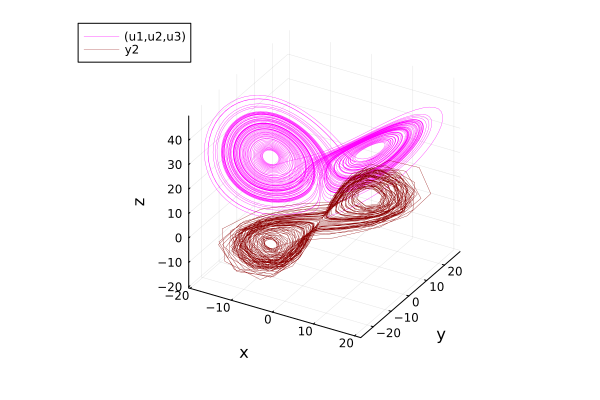

In [8]:
#On the same Plot
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring)
plot!(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues)

# The Rossler Differential Equations
The Rössler attractor is the attractor for the Rössler system, a system of three non-linear ordinary differential equations originally studied by Otto Rössler in the 1970s.These differential equations define a continuous-time dynamical system that exhibits chaotic dynamics associated with the fractal properties of the attractor.

$$
\begin{aligned}
\dot{x} & = - y - z\\
\dot{y} & = x + ay\\
\dot{z} & = b + z(x-c)\\
\end{aligned}
$$

In [9]:
#Defining the Rossler Differential Equations
function rossler!(du,u,p,t)
    x,y,z = u
    a,b,c = p
    
    du[1] = -y - z
    du[2] = x + a*y
    du[3] = b + z*(x-c)
    return nothing
end

rossler! (generic function with 1 method)

In [10]:
initial = [1.0,1.0,1.0] #Initial Conditions
parameters = [0.2,0.2,5.7] #Value of a,b and c
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(rossler!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 383-element Vector{Float64}:
   0.0
   0.061603477503225555
   0.13821833464070965
   0.22922647488340114
   0.33276196806396785
   0.44717266351654633
   0.5707477079603281
   0.7024714414462374
   0.8422140933544835
   0.9913931123387644
   1.1523925215801125
   1.3290905735222311
   1.5263828150866288
   ⋮
  96.69693434047964
  96.88188964501325
  97.10243391538145
  97.37600644052728
  97.73641943078479
  98.04660613762528
  98.37807280377949
  98.74853853551026
  99.16104641250936
  99.54689492867732
  99.98319446054667
 100.0
u: 383-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [0.8824156611718554, 1.0706898174885333, 0.7565358121033396]
 [0.7483732102038639, 1.1501171087221853, 0.5330923791600904]
 [0.6001427658757752, 1.2331202281115623, 0.3519825076263367]
 [0.4390454205983956, 1.313262415358709, 0.22186222729005484]
 [0.264455039442519

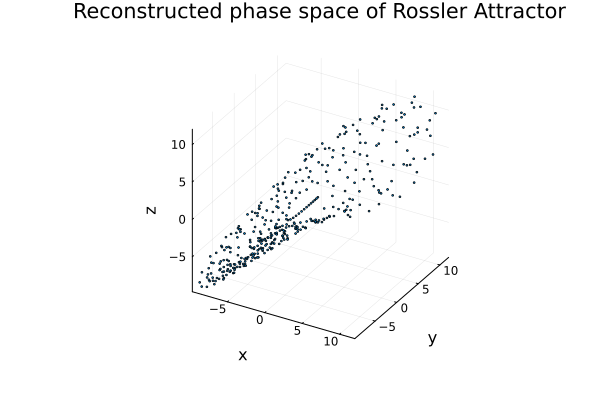

In [11]:
# Extract time series of x variable
x = sol[1,:]

# Embedding parameters
m = 3   # embedding dimension
τ = 1   # time delay

N = length(x) - (m-1)*τ
X = zeros(m, N)
for i in 1:N
    for j in 1:m
        X[j,i] = x[i + (j-1)*τ]
    end
end

# Scatter Plot reconstructed phase space
scatter(X[1,:], X[2,:], X[3,:], markersize=1, xlabel="x", ylabel="y", zlabel="z", legend=false,title="Reconstructed phase space of Rossler Attractor")

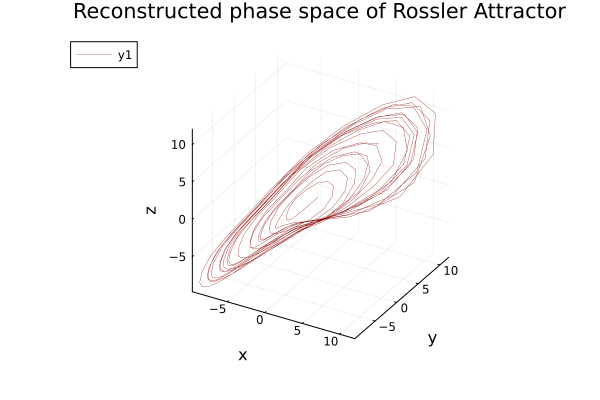

In [12]:
# Line Plot reconstructed phase space
plot(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues,title="Reconstructed phase space of Rossler Attractor")

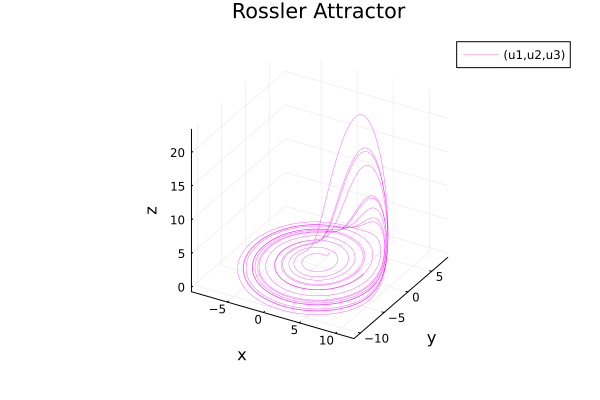

In [13]:
#Lorenz Attractor
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring,title="Rossler Attractor")

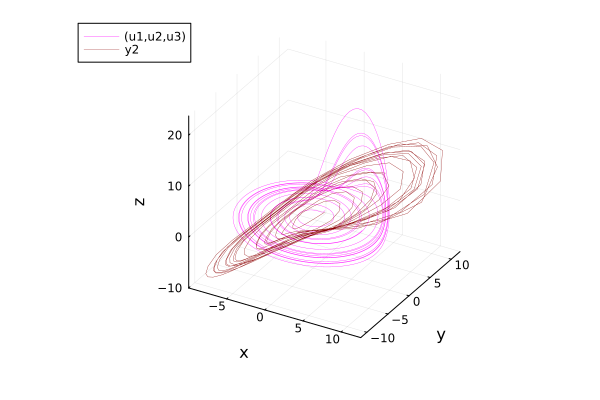

In [14]:
#On the same Plot
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring)
plot!(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues)

# The Rikitake Differential Equations
The Rikitake dynamical system is a model which attempts to explain the irregular polarity switching of the geomagnetic field. The system exhibits Lorenz-type chaos and orbiting around two unstable fixed points. We employ techniques in the vein of the Lyapunov function method in an attempt to characterize the dynamics on the attractor of the system.

$$
\begin{aligned}
\dot{x} & = - vx + zy \\
\dot{y} & = - vy + (z - a)x\\
\dot{z} & = 1 - xy
\end{aligned}
$$

In [3]:
#Defining the Rikitake Differential Equations
function rikitake!(du,u,p,t)
    x,y,z = u
    a,v = p
    
    du[1] = -v*x + z*y
    du[2] = -v*y + (z-a)*x
    du[3] = 1 - x*y
    
    return nothing
end

rikitake! (generic function with 1 method)

In [4]:
initial = [1.0,1.0,1.0] #Initial Conditions
parameters = [5,2.1] #value of a and v
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(rikitake!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 343-element Vector{Float64}:
   0.0
   0.06193182297645054
   0.15338092428439914
   0.26059694151154295
   0.38507497486106895
   0.5369048541079036
   0.7067265046018528
   0.8873430258579046
   1.0666736370681653
   1.254475664502026
   1.4683121729306177
   1.693167221682271
   1.8916298106177
   ⋮
  96.51964513581399
  96.78936186688553
  97.09573060353797
  97.44453623214251
  97.815160125191
  98.18124936387174
  98.57021025321191
  98.92883065975684
  99.21097197394855
  99.47441555472858
  99.75820974748747
 100.0
u: 343-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [0.9257533770963816, 0.6545913208705023, 1.0127365001716746]
 [0.8017196249113028, 0.25580473481068394, 1.0686428311496243]
 [0.6481413584193024, -0.06504015910325572, 1.1689353852842572]
 [0.4731098673150492, -0.279321864064869, 1.3058790569012888]
 [0.2815843269103164, -0.

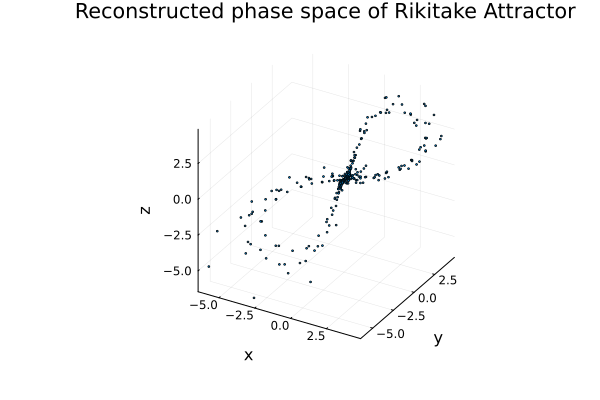

In [7]:
# Extract time series of x variable
x = sol[1,:]

# Embedding parameters
m = 3   # embedding dimension
τ = 1   # time delay

N = length(x) - (m-1)*τ
X = zeros(m, N)
for i in 1:N
    for j in 1:m
        X[j,i] = x[i + (j-1)*τ]
    end
end

# Scatter Plot reconstructed phase space
scatter(X[1,:], X[2,:], X[3,:], markersize=1, xlabel="x", ylabel="y", zlabel="z", legend=false,title="Reconstructed phase space of Rikitake Attractor")

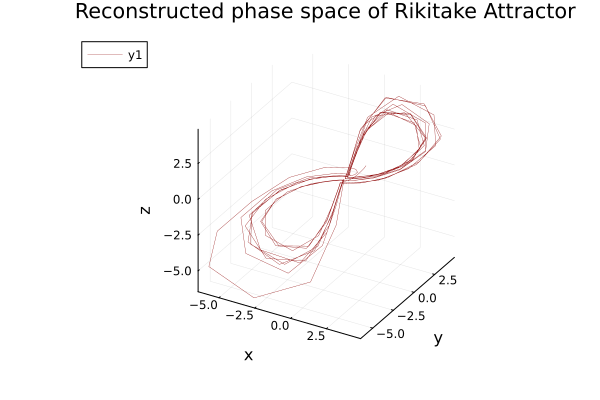

In [9]:
# Line Plot reconstructed phase space
plot(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues,title="Reconstructed phase space of Rikitake Attractor")

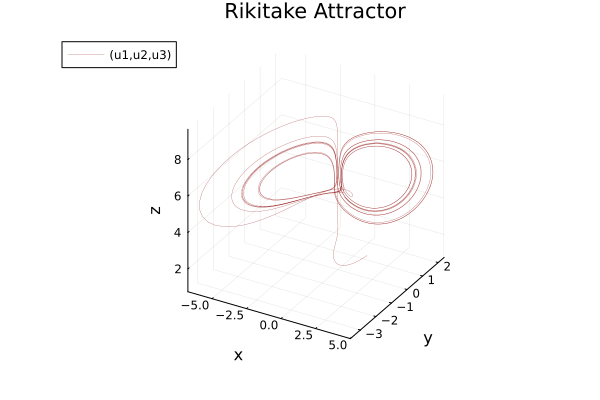

In [10]:
#Plotting the solution of ODE
plot(sol, idxs=(1,2,3), xlabel="x", ylabel="y", zlabel="z", title="Rikitake Attractor", lw=0.2, color=:redsblues)

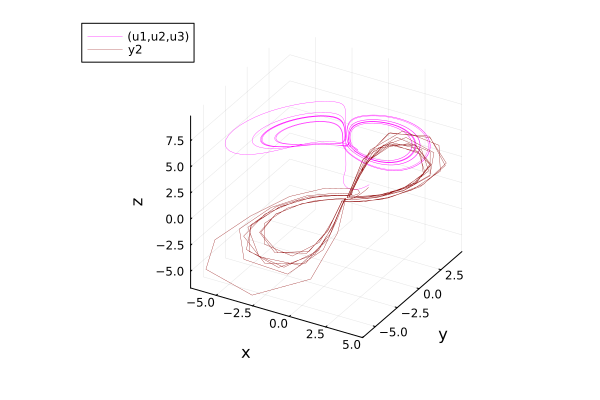

In [11]:
#On the same Plot
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring)
plot!(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues)